In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("new_train.csv",index_col = 'Date', parse_dates = True)

In [3]:
train.head()

,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,...,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-01,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000,285.40,285.95,281.50,...,844.44,3878011,327474904340000,1235.0,1238.00,1177.0,1181.70,1197.29,1786082,213845404410000
2010-06-02,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000,284.00,284.80,279.25,...,838.31,3320996,278403743240000,1195.0,1206.95,1168.5,1201.15,1189.87,1307410,155564994855000
2010-06-03,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000,283.00,286.85,282.50,...,853.51,2494522,212910342645000,1211.0,1248.00,1211.0,1242.30,1231.63,1482919,182640434320000
2010-06-04,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000,288.85,291.80,277.00,...,862.85,2963920,255740999120000,1240.0,1258.00,1240.0,1245.45,1249.72,1454459,181767075850000
2010-06-07,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000,285.00,289.10,285.00,...,839.89,3471483,291567400640000,1218.6,1225.00,1196.0,1214.80,1209.27,1424594,172272511430000


In [4]:
train.isna().sum()

Open-Stock-1        0
High-Stock-1        0
Low-Stock-1         0
Close-Stock-1       0
VWAP-Stock-1        0
Volume-Stock-1      0
Turnover-Stock-1    0
Open-Stock-2        0
High-Stock-2        0
Low-Stock-2         0
Close-Stock-2       0
VWAP-Stock-2        0
Volume-Stock-2      0
Turnover-Stock-2    0
Open-Stock-3        0
High-Stock-3        0
Low-Stock-3         0
Close-Stock-3       0
VWAP-Stock-3        0
Volume-Stock-3      0
Turnover-Stock-3    0
Open-Stock-4        0
High-Stock-4        0
Low-Stock-4         0
Close-Stock-4       0
VWAP-Stock-4        0
Volume-Stock-4      0
Turnover-Stock-4    0
Open-Stock-5        0
High-Stock-5        0
Low-Stock-5         0
Close-Stock-5       0
VWAP-Stock-5        0
Volume-Stock-5      0
Turnover-Stock-5    0
dtype: int64

In [5]:
train['diff_4'] = train['Close-Stock-4'] - train['Open-Stock-4']

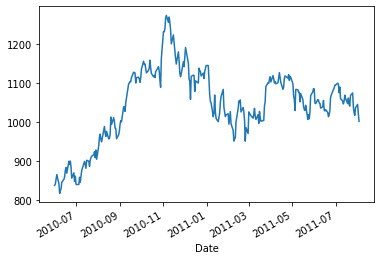

In [6]:
train['Close-Stock-4'].plot()

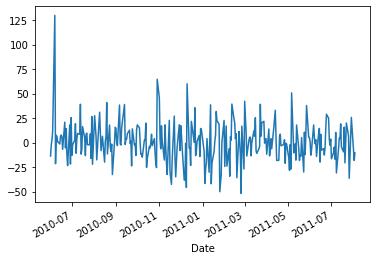

In [7]:
train['diff_4'].plot()

In [8]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(train['Close-Stock-4'])

1. ADF :  -2.4809391437322614
2. P-Value :  0.12018118343013529
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 298
5. Critical Values :
	 1% :  -3.4524859843440754
	 5% :  -2.871288184343229
	 10% :  -2.571964047565425


In [9]:
ad_test(train['diff_4'])

1. ADF :  -17.359027781632694
2. P-Value :  5.2170833851892236e-30
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 298
5. Critical Values :
	 1% :  -3.4524859843440754
	 5% :  -2.871288184343229
	 10% :  -2.571964047565425


In [10]:
#P value not less than 0.05 hence the dataset is not stationary 

In [11]:
train['Close-Stock-4'] = train['Close-Stock-4'].diff()

In [12]:
train['Close-Stock-4']

Date
2010-06-01      NaN
2010-06-02     4.35
2010-06-03    11.80
2010-06-04    11.75
2010-06-07   -23.90
              ...  
2011-07-28    -7.45
2011-07-29    19.30
2011-08-01     8.60
2011-08-02   -23.65
2011-08-03   -19.75
Name: Close-Stock-4, Length: 299, dtype: float64

In [13]:
train = train.dropna()

In [14]:
train['Close-Stock-4']

Date
2010-06-02     4.35
2010-06-03    11.80
2010-06-04    11.75
2010-06-07   -23.90
2010-06-08   -24.45
              ...  
2011-07-28    -7.45
2011-07-29    19.30
2011-08-01     8.60
2011-08-02   -23.65
2011-08-03   -19.75
Name: Close-Stock-4, Length: 298, dtype: float64

In [15]:
ad_test(train['Close-Stock-4'])

1. ADF :  -11.172115662505082
2. P-Value :  2.6247762281510605e-20
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 295
5. Critical Values :
	 1% :  -3.452713099849546
	 5% :  -2.871387839457783
	 10% :  -2.5720171933352485


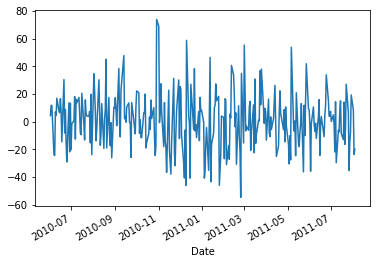

In [16]:
train['Close-Stock-4'].plot()

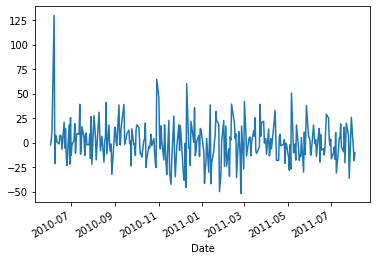

In [17]:
train['diff_4'].plot()

In [18]:
from pmdarima import auto_arima

In [19]:
#Auto arima is going to try diff values for the orders like (0,0,0), (0,0,1) and so on and return the best set of values for orders
stepwise_fit = auto_arima(train['Close-Stock-4'] , trace  = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2644.282, Time=1.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2639.188, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2641.146, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2641.145, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2637.411, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2643.143, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 2.026 seconds


In [20]:
stepwise_fit = auto_arima(train['diff_4'] , trace  = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2644.631, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2637.580, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2639.556, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2639.555, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2635.675, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2640.940, Time=0.21 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.672 seconds


In [21]:
#Goal is to minimise AIC

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
train.shape

(298, 36)

In [24]:
train_model = train.iloc[:-30]
test_model = train.iloc[-30:]
print(train_model.shape, test_model.shape)

(268, 36) (30, 36)


In [25]:
model = ARIMA(train_model['Close-Stock-3'], order = (0,0,0))
model = model.fit()
model.summary()

C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          Close-Stock-3   No. Observations:                  268
Model:                     ARMA(0, 0)   Log Likelihood               -1799.031
Method:                           css   S.D. of innovations            199.111
Date:                Sun, 10 Jan 2021   AIC                           3602.062
Time:                        21:12:44   BIC                           3609.244
Sample:                             0   HQIC                          3604.946
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2651.6694     12.163    218.017      0.000    2627.831    2675.508
==============================================================================
"""

In [26]:
model_1 = ARIMA(train_model['diff_4'], order = (0,0,0))
model_1 = model_1.fit()
model_1.summary()

C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 diff_4   No. Observations:                  268
Model:                     ARMA(0, 0)   Log Likelihood               -1189.288
Method:                           css   S.D. of innovations             20.465
Date:                Sun, 10 Jan 2021   AIC                           2382.576
Time:                        21:12:44   BIC                           2389.758
Sample:                             0   HQIC                          2385.461
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4925      1.250      0.394      0.694      -1.958       2.943
==============================================================================
"""

In [27]:
start=len(train_model)
end=len(train_model)+len(test_model)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index = train.index[start:end+1]
print(pred)

Date
2011-06-23    2651.669403
2011-06-24    2651.669403
2011-06-27    2651.669403
2011-06-28    2651.669403
2011-06-29    2651.669403
2011-06-30    2651.669403
2011-07-01    2651.669403
2011-07-04    2651.669403
2011-07-05    2651.669403
2011-07-06    2651.669403
2011-07-07    2651.669403
2011-07-08    2651.669403
2011-07-11    2651.669403
2011-07-12    2651.669403
2011-07-13    2651.669403
2011-07-14    2651.669403
2011-07-15    2651.669403
2011-07-18    2651.669403
2011-07-19    2651.669403
2011-07-20    2651.669403
2011-07-21    2651.669403
2011-07-22    2651.669403
2011-07-25    2651.669403
2011-07-26    2651.669403
2011-07-27    2651.669403
2011-07-28    2651.669403
2011-07-29    2651.669403
2011-08-01    2651.669403
2011-08-02    2651.669403
2011-08-03    2651.669403
dtype: float64


C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [28]:
start=len(train_model)
end=len(train_model)+len(test_model)-1
pred_1 =model_1.predict(start=start,end=end,typ='levels')
pred_1.index = train.index[start:end+1]
print(pred_1)

Date
2011-06-23    0.492537
2011-06-24    0.492537
2011-06-27    0.492537
2011-06-28    0.492537
2011-06-29    0.492537
2011-06-30    0.492537
2011-07-01    0.492537
2011-07-04    0.492537
2011-07-05    0.492537
2011-07-06    0.492537
2011-07-07    0.492537
2011-07-08    0.492537
2011-07-11    0.492537
2011-07-12    0.492537
2011-07-13    0.492537
2011-07-14    0.492537
2011-07-15    0.492537
2011-07-18    0.492537
2011-07-19    0.492537
2011-07-20    0.492537
2011-07-21    0.492537
2011-07-22    0.492537
2011-07-25    0.492537
2011-07-26    0.492537
2011-07-27    0.492537
2011-07-28    0.492537
2011-07-29    0.492537
2011-08-01    0.492537
2011-08-02    0.492537
2011-08-03    0.492537
dtype: float64


C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


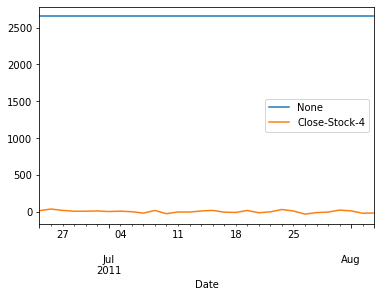

In [29]:
pred.plot(legend = True)
test_model['Close-Stock-4'].plot(legend = True)

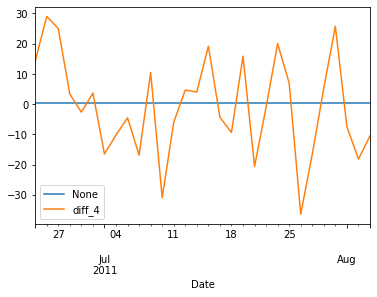

In [30]:
pred_1.plot(legend = True)
test_model['diff_4'].plot(legend = True)

In [31]:
test_model['Close-Stock-4'].mean()

-0.5649999999999977

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test_model['Close-Stock-4'].mean()
rmse=sqrt(mean_squared_error(pred,test_model['Close-Stock-4']))
print(rmse)

2652.284523463233


In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test_model['diff_4'].mean()
rmse=sqrt(mean_squared_error(pred_1,test_model['diff_4']))
print(rmse)

16.27251378691756


In [34]:
test_op = pd.read_csv("new_test.csv",index_col = 'Date', parse_dates = True)
y =model_1.predict(start= 1,end= 97)
output = pd.DataFrame(y)
output.to_csv('Stock4.csv', index=False)